In [2]:
import nibabel as ni
import numpy as np
import pandas as pd
from scipy.spatial.distance import chebyshev as cheby
import random
import os
os.chdir('/home/jagust/dino/surf/')
from surf import *
%matplotlib inline

In [3]:
aparc = ni.load('/home/jagust/graph/data/mri1.5/rest/freesurfer/fsaverage_nii/aparc+aseg.nii.gz').get_data()
roidat = pd.read_csv('/home/jagust/graph/scripts/fs_gm.csv', header=None)
roi = np.zeros(shape=aparc.shape)
roi[aparc==0]=1.0
locs = np.where(roi==1)
print len(locs[0])

15585573


In [14]:
aparc = ni.load('/home/jagust/graph/data/mri1.5/rest/freesurfer/fsaverage_nii/aparc+aseg.nii.gz').get_data()
roidat = pd.read_csv('/home/jagust/graph/scripts/fs_gm.csv', header=None)
points = []
for reg in roidat[1].values:
    roi = np.zeros(shape=aparc.shape)
    roi[aparc==reg]=1.0
    locs = np.where(roi==1)
    if len(locs[0]) == 0:
        count += 1
    print "Reg: " + str(reg)
    center = find_center(locs)
    print "Found center: " + str(center)
    points.append(center)

Reg: 8
Found center: [181, 69, 91]
Reg: 10
Found center: [154, 95, 123]
Reg: 11
Found center: [150, 142, 142]
Reg: 12
Found center: [164, 127, 127]
Reg: 13
Found center: [156, 117, 126]
Reg: 17
Found center: [165, 112, 107]
Reg: 18
Found center: [161, 122, 105]
Reg: 47
Found center: [128, 78, 121]
Reg: 49
Found center: [127, 118, 128]
Reg: 50
Found center: [122, 131, 126]
Reg: 51
Found center: [116, 130, 117]
Reg: 52
Found center: [114, 132, 125]
Reg: 53
Found center: [114, 120, 107]
Reg: 54
Found center: [114, 122, 108]
Reg: 1002
Found center: [140, 159, 150]
Reg: 1003
Found center: [175, 151, 165]
Reg: 1005
Found center: [148, 62, 144]
Reg: 1006
Found center: [161, 122, 94]
Reg: 1007
Found center: [174, 69, 108]
Reg: 1008
Found center: [181, 73, 153]
Reg: 1009
Found center: [188, 85, 109]
Reg: 1010
Found center: [148, 77, 129]
Reg: 1011
Found center: [179, 53, 138]
Reg: 1012
Found center: [173, 154, 113]
Reg: 1013
Found center: [161, 84, 120]
Reg: 1014
Found center: [142, 176, 129]
R

In [13]:
roidat[1].values

array([   8,   10,   11,   12,   13,   17,   18,   47,   49,   50,   51,
         52,   53,   54, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035])

In [350]:
points

[[181, 69, 91],
 [154, 95, 123],
 [150, 142, 142],
 [164, 127, 127],
 [156, 117, 126],
 [165, 112, 107],
 [161, 122, 105],
 [128, 78, 121],
 [127, 118, 128],
 [122, 131, 126],
 [116, 130, 117],
 [114, 132, 125],
 [114, 120, 107],
 [114, 122, 108],
 [140, 159, 150],
 [175, 151, 165],
 [148, 62, 144],
 [161, 122, 94],
 [174, 69, 108],
 [181, 73, 153],
 [188, 85, 109],
 [148, 77, 129],
 [179, 53, 138],
 [173, 154, 113],
 [161, 84, 120],
 [142, 176, 129],
 [196, 106, 114],
 [164, 106, 102],
 [146, 98, 168],
 [185, 150, 144],
 [179, 163, 117],
 [183, 158, 134],
 [154, 61, 133],
 [194, 118, 151],
 [145, 102, 166],
 [190, 134, 150],
 [154, 67, 134],
 [141, 170, 136],
 [176, 155, 162],
 [154, 154, 182],
 [168, 80, 185],
 [196, 105, 131],
 [194, 97, 153],
 [144, 195, 124],
 [172, 145, 95],
 [184, 113, 134],
 [170, 137, 121],
 [126, 139, 164],
 [104, 129, 177],
 [126, 59, 145],
 [111, 117, 101],
 [103, 85, 110],
 [99, 65, 168],
 [97, 135, 87],
 [127, 84, 158],
 [121, 29, 141],
 [121, 186, 105],


In [351]:
# np.save('/home/jagust/dino/surf/map_points.npy', np.array(points))

In [389]:
# points
import random
g = nx.Graph()
g.add_nodes_from(range(80))
pos = {}
nc = range(80)
nc = ['blue' for node in nc]
for node in range(80):
    pos[node] = points[node][1:]
while len(g.edges()) < (.80 * 80):
    s, t  = random.randrange(80), random.randrange(80)
    if (s, t) in g.edges() or (t, s) in g.edges():
        continue
    else:
        g.add_edge(s, t)
# Set Colors:
for node in range(80):
    x, y = pos[node][0], pos[node][1]
    if x > 130 and y > 140:
        nc[node] = 'r'
    elif x < 140 and y > 130:
        nc[node] = 'g'
    elif x > 140 and y < 140:
        nc[node] = 'y'

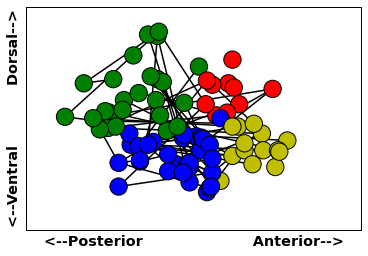

In [390]:
frame = 0
g.add_edge(55, 22)
nx.draw_networkx_nodes(g, pos=pos, node_color=nc)
nx.draw_networkx_edges(g, pos=pos, width = 1.5)
plt.xticks([])
plt.yticks([])
plt.ylabel("<--Ventral            Dorsal-->", size='x-large', weight = 'bold')
plt.xlabel("<--Posterior                      Anterior-->", size='x-large', weight = 'bold')
plt.savefig('/home/jagust/dino/surf/talk/grey.png', axisbg='black')
frame += 1

In [286]:
# pos

In [ ]:
196 195 195 88 29 87

In [287]:
# points

In [93]:
xmax, ymax, zmax, xmin, ymin, zmin = 0, 0, 0, 10000, 10000, 100000
for i in points:
    if i[0] > xmax:
        xmax = i[0]
    if i[1] > ymax:
        ymax = i[1]
    if i[2] > zmax:
        zmax = i[2]
    if i[0] < xmin:
        xmin = i[0]
    if i[1] < ymin:
        ymin = i[1]
    if i[2] < zmin:
        zmin = i[2]
print xmax, ymax, ymax, xmin, ymin, zmin

196 195 195 88 29 87


In [313]:
# points
import random
g = nx.Graph()
g.add_nodes_from(range(80))
pos = {}
nc = range(80)
nc = ['b' for node in nc]
for node in range(80):
    pos[node] = points[node]

In [314]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

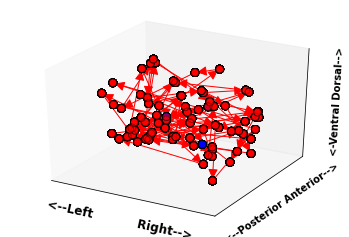

In [381]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_ylabel('<--Posterior Anterior-->', size = 'medium', weight='extra bold')
ax.set_xlabel('<--Left           Right-->', size = 'large', weight ='extra bold')
ax.set_zlabel('<-Ventral Dorsal-->', size = 'medium', weight = 'extra bold')
ax.set_xlim3d(80, 200)
ax.set_ylim3d(20, 200)
ax.set_zlim3d(80, 200)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
xs = [p[0] for p in points]
ys = [p[1] for p in points]
zs = [p[2] for p in points]
prev = 55
c = ['b' for i in range(80)]
c[55] = 'r'
prev = 55
clip = 2
for new in order[2:]:
    c[new] = 'r'
    ax.scatter(xs, ys, zs, c=c, marker='o', s=60)
    from matplotlib.patches import FancyArrowPatch
    a = Arrow3D([points[prev][0],points[new][0]],[points[prev][1],points[new][1]], [points[prev][2],points[new][2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
    ax.add_artist(a)
    plt.savefig('/home/jagust/dino/surf/talk/clip_%s.png' % (str(100 + clip)))
    clip += 1
    prev = new
# plt.tick_params(axis = 'x', which='both', top='off', bottom='off')
# plt.tick_params(axis = 'y', which='both', top='off', bottom='off', labelbottom='off')
plt.show()

In [317]:
order

[55,
 22,
 58,
 27,
 25,
 60,
 39,
 72,
 73,
 66,
 64,
 40,
 33,
 31,
 74,
 41,
 14,
 15,
 47,
 65,
 48,
 32,
 69,
 36,
 28,
 54,
 61,
 43,
 23,
 44,
 77,
 56,
 70,
 76,
 46,
 1,
 21,
 71,
 8,
 12,
 5,
 52,
 53,
 38,
 79,
 68,
 37,
 35,
 20,
 63,
 62,
 19,
 0,
 30,
 75,
 42,
 50,
 29,
 10,
 18,
 51,
 13,
 4,
 17,
 6,
 11,
 78,
 3,
 49,
 59,
 67,
 7,
 24,
 45,
 26,
 57,
 34,
 16,
 2,
 9]

In [127]:
order

[55,
 22,
 58,
 27,
 25,
 60,
 39,
 72,
 73,
 66,
 64,
 40,
 33,
 31,
 74,
 41,
 14,
 15,
 47,
 65,
 48,
 32,
 69,
 36,
 28,
 54,
 61,
 43,
 23,
 44,
 77,
 56,
 70,
 76,
 46,
 1,
 21,
 71,
 8,
 12,
 5,
 52,
 53,
 38,
 79,
 68,
 37,
 35,
 20,
 63,
 62,
 19,
 0,
 30,
 75,
 42,
 50,
 29,
 10,
 18,
 51,
 13,
 4,
 17,
 6,
 11,
 78,
 3,
 49,
 59,
 67,
 7,
 24,
 45,
 26,
 57,
 34,
 16,
 2,
 9]

In [11]:
import random
def find_center(locs):
    ''' Finds the center of a region based on
    minimizing the Chebyshev distance
    
    Parameters:
    -----------
    locs : Coordinates of regions
    
    Returns:
    --------
    center : x, y, z coordinates of center
    '''
    
    # Seperate points by dimension
    x_coor, y_coor, z_coor = locs[0], locs[1], locs[2]
    
    # Assert that we have an equal number of x, y, z coordinates
    if len(x_coor) != len(y_coor) or len(x_coor) != len(z_coor):
        print "Error"
        
    # Initialize center and running minimum distance
    center, curr_min = [0, 0, 0], sys.float_info.max
    
    # Iterate through points
    num_pts = len(x_coor)
    for s in range(num_pts):
        dist = 0.0
        for t in range(len(x_coor)):
            dist += 1.0 * cheby([x_coor[s], y_coor[s], z_coor[s]], [x_coor[t], y_coor[t], z_coor[t]])
#         Update Center
        if dist < curr_min:
            center[0], center[1], center[2] = x_coor[s], y_coor[s], z_coor[s]
    return center

In [15]:
sys.float_info.max < 0.4

False

In [22]:
cheby([0, 0, 0], [0 , 1, 9])

9

In [ ]:
    for s in range(num_pts):
#         dist = 0.0
#         sub_num_pts = int(num_pts * 0.1)
#         for i in range(sub_num_pts):
#             rand_ind = random.randrange(num_pts)
#             dist += 1.0 * cheby([x_coor[s], y_coor[s], z_coor[s]], [x_coor[rand_ind], y_coor[rand_ind], z_coor[rand_ind]])
